# Exploratory Analysis of Video Game Sales Project 
This is a practice and sample notebook for data analysis. In this notebook, you'll notice that some graphs repeat with slight variations. The reason I've done this is to have a record of how they look so that I can use this notebook as a reference, since the purpose of this project is learning.

In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# I have inserted the link to the dataset in the path field. Follow link if you want to download the dataset
df = pd.read_csv("https://www.kaggle.com/datasets/gregorut/videogamesales/data")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# Data Cleaning

In [8]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [10]:
df = df.dropna()
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

# Date Conversion and Removing Column
Since we have removed some values, the rank won't be in order anymore

In [16]:
df['Year']=df['Year'].astype(int)
df = df.drop('Rank', axis=1, errors='ignore')

df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16291 non-null  object 
 1   Platform      16291 non-null  object 
 2   Year          16291 non-null  int32  
 3   Genre         16291 non-null  object 
 4   Publisher     16291 non-null  object 
 5   NA_Sales      16291 non-null  float64
 6   EU_Sales      16291 non-null  float64
 7   JP_Sales      16291 non-null  float64
 8   Other_Sales   16291 non-null  float64
 9   Global_Sales  16291 non-null  float64
dtypes: float64(5), int32(1), object(4)
memory usage: 1.3+ MB


In [20]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


# Taking a look at Publishers

In [30]:
# check the range of value for the attribute "Publisher"
print(len(df['Publisher'].unique()))
print(df['Publisher'].unique())

576
['Nintendo' 'Microsoft Game Studios' 'Take-Two Interactive'
 'Sony Computer Entertainment' 'Activision' 'Ubisoft' 'Bethesda Softworks'
 'Electronic Arts' 'Sega' 'SquareSoft' 'Atari' '505 Games' 'Capcom'
 'GT Interactive' 'Konami Digital Entertainment'
 'Sony Computer Entertainment Europe' 'Square Enix' 'LucasArts'
 'Virgin Interactive' 'Warner Bros. Interactive Entertainment'
 'Universal Interactive' 'Eidos Interactive' 'RedOctane' 'Vivendi Games'
 'Enix Corporation' 'Namco Bandai Games' 'Palcom' 'Hasbro Interactive'
 'THQ' 'Fox Interactive' 'Acclaim Entertainment' 'MTV Games'
 'Disney Interactive Studios' 'Majesco Entertainment' 'Codemasters'
 'Red Orb' 'Level 5' 'Arena Entertainment' 'Midway Games' 'JVC'
 'Deep Silver' '989 Studios' 'NCSoft' 'UEP Systems' 'Parker Bros.' 'Maxis'
 'Imagic' 'Tecmo Koei' 'Valve Software' 'ASCII Entertainment' 'Mindscape'
 'Infogrames' 'Unknown' 'Square' 'Valve' 'Activision Value' 'Banpresto'
 'D3Publisher' 'Oxygen Interactive' 'Red Storm Entertainmen

# 1. Top-Selling Games by Genre

In [38]:
print("\nTop-Selling Games by Genre:")
top_selling_by_genre = df.loc[df.groupby('Genre')['Global_Sales'].idxmax()]
sorted_top_selling = top_selling_by_genre.sort_values(by='Global_Sales', ascending=False)
sorted_top_selling_by_genre[['Genre', 'Name', 'Global_Sales']]


Top-Selling Games by Genre:


,Genre,Name,Global_Sales
0,Sports,Wii Sports,82.74
1,Platform,Super Mario Bros.,40.24
2,Racing,Mario Kart Wii,35.82
4,Role-Playing,Pokemon Red/Pokemon Blue,31.37
5,Puzzle,Tetris,30.26
7,Misc,Wii Play,29.02
9,Shooter,Duck Hunt,28.31
10,Simulation,Nintendogs,24.76
16,Action,Grand Theft Auto V,21.40
39,Fighting,Super Smash Bros. Brawl,13.04


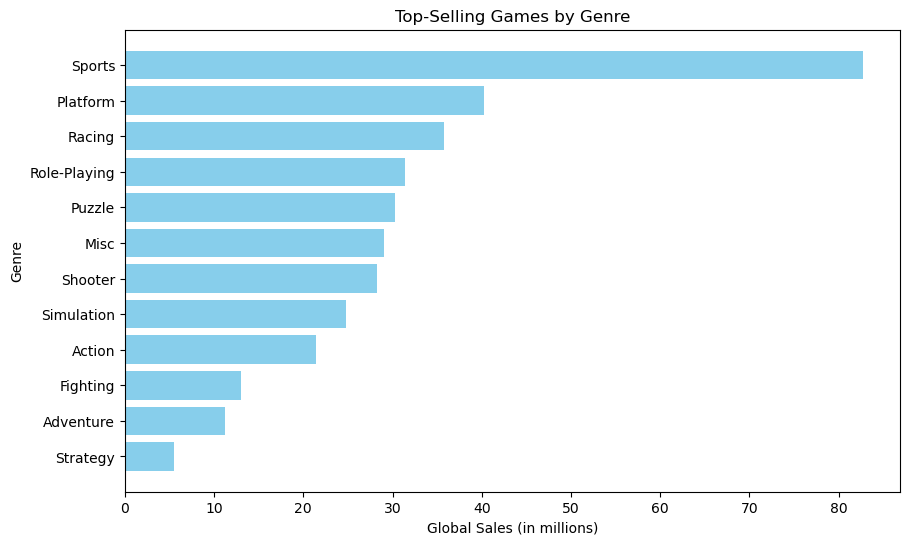

In [40]:
plt.figure(figsize=(10, 6))
plt.barh(sorted_top_selling['Genre'], sorted_top_selling['Global_Sales'], color='skyblue')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Genre')
plt.title('Top-Selling Games by Genre')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value on top
plt.show()

# 2. Sales Distribution by Platform/Console

In [43]:
print("\nSales Distribution by Platform:")
platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
platform_sales


Sales Distribution by Platform:


Platform
PS2     1233.46
X360     969.60
PS3      949.35
Wii      909.81
DS       818.91
PS       727.39
GBA      305.62
PSP      291.71
PS4      278.10
PC       254.70
GB       254.42
XB       252.09
NES      251.07
3DS      246.27
N64      218.21
SNES     200.05
GC       197.14
XOne     141.06
2600      86.57
WiiU      81.86
PSV       61.60
SAT       33.59
GEN       28.36
DC        15.97
SCD        1.87
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: Global_Sales, dtype: float64

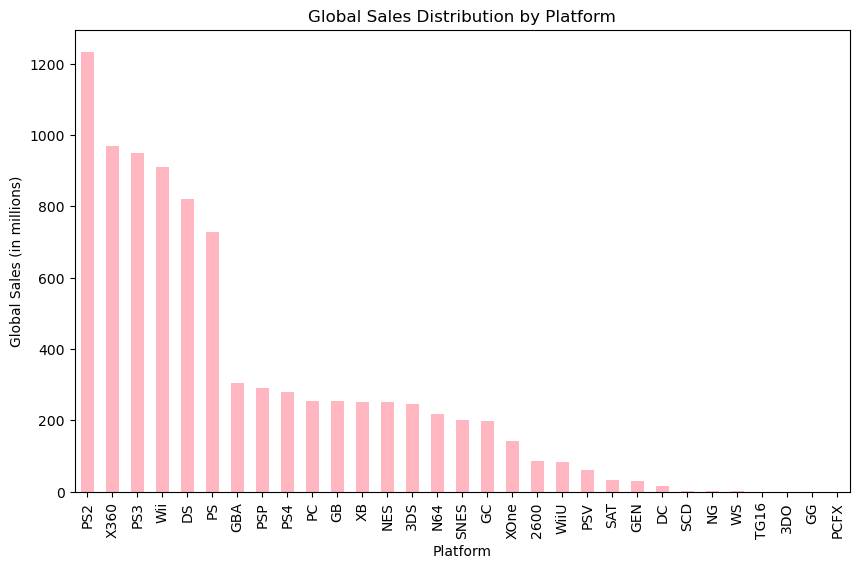

In [48]:
plt.figure(figsize=(10, 6))
platform_sales.plot(kind='bar', color='lightpink')
plt.title('Global Sales Distribution by Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales (in millions)')
plt.show()

# 3. Sales Trends Over Time

In [53]:
print("\nSales Trends Over Time:")
sales_by_year = df.groupby('Year')['Global_Sales'].sum()
sales_by_year


Sales Trends Over Time:


Year
1980     11.38
1981     35.77
1982     28.86
1983     16.79
1984     50.36
1985     53.94
1986     37.07
1987     21.74
1988     47.22
1989     73.45
1990     49.39
1991     32.23
1992     76.16
1993     45.98
1994     79.17
1995     88.11
1996    199.15
1997    200.98
1998    256.47
1999    251.27
2000    201.56
2001    331.47
2002    395.52
2003    357.85
2004    414.01
2005    458.51
2006    521.04
2007    609.92
2008    678.90
2009    667.30
2010    600.29
2011    515.80
2012    363.49
2013    368.11
2014    337.03
2015    264.44
2016     70.90
2017      0.05
2020      0.29
Name: Global_Sales, dtype: float64

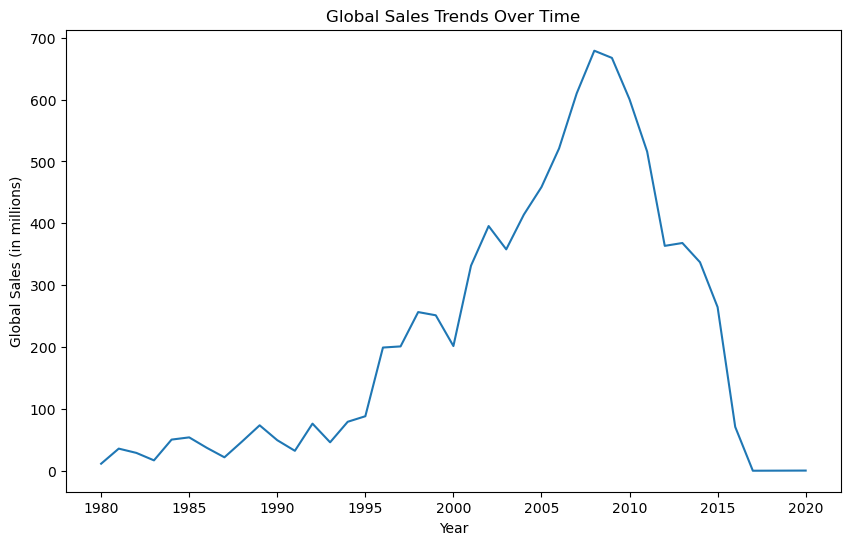

In [55]:
plt.figure(figsize=(10, 6))
sales_by_year.plot(kind='line')
plt.title('Global Sales Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.show()

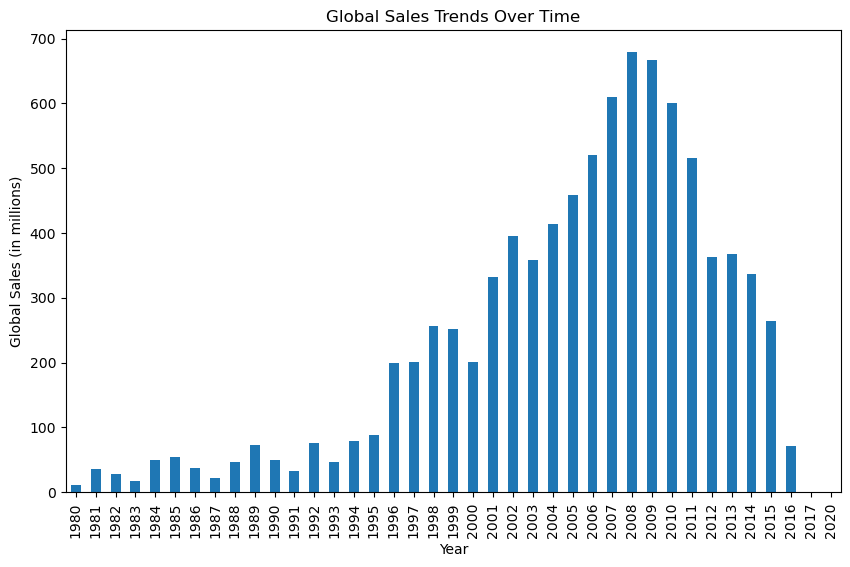

In [57]:
plt.figure(figsize=(10, 6))
sales_by_year.plot(kind='bar')
plt.title('Global Sales Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.show()

# 4. Number of Game Releases Per Year

In [107]:
print("\nNumber of Game Releases Per Year:")
games_per_year = df['Year'].value_counts().sort_index()
games_per_year


Number of Game Releases Per Year:


Year
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     349
2001     482
2002     829
2003     775
2004     744
2005     936
2006    1008
2007    1201
2008    1428
2009    1431
2010    1257
2011    1136
2012     655
2013     546
2014     580
2015     614
2016     342
2017       3
2020       1
Name: count, dtype: int64

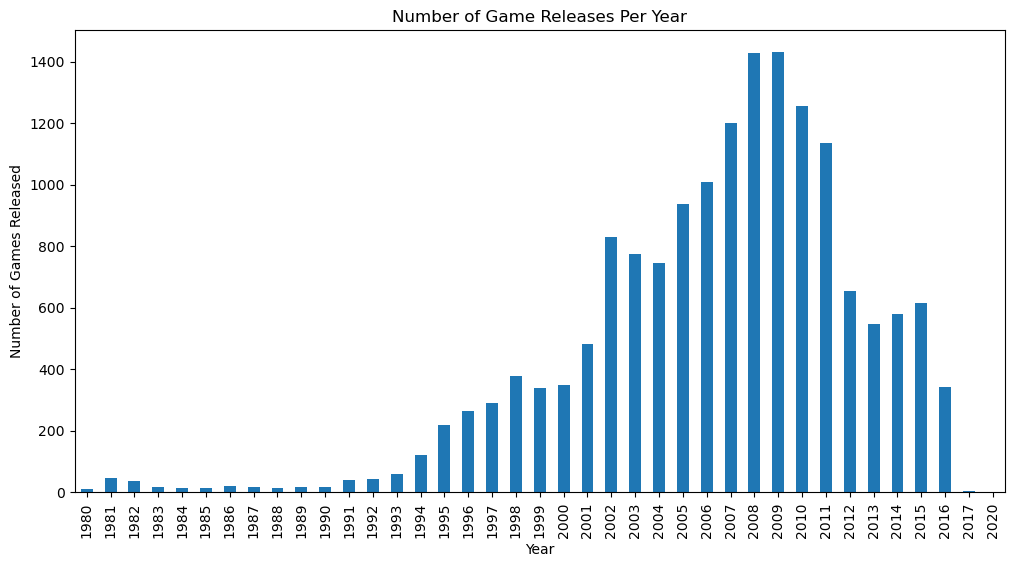

In [109]:
plt.figure(figsize=(12, 6))
games_per_year.plot(kind='bar')
plt.title('Number of Game Releases Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Games Released')
plt.show()

# 5. Regional Preferences for Video Game Genres

In [60]:
print("\nRegional Preferences for Video Game Genres:")
genre_sales_by_region = df.groupby('Genre').sum()[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
genre_sales_by_region


Regional Preferences for Video Game Genres:


,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,861.77,516.48,158.65,184.92
Adventure,101.93,63.74,51.99,16.70
Fighting,220.74,100.00,87.15,36.19
Misc,396.92,211.77,106.67,73.92
Platform,445.99,200.65,130.65,51.51
Puzzle,122.01,50.52,56.68,12.47
Racing,356.93,236.31,56.61,76.68
Role-Playing,326.50,187.57,350.29,59.38
Shooter,575.16,310.45,38.18,101.90


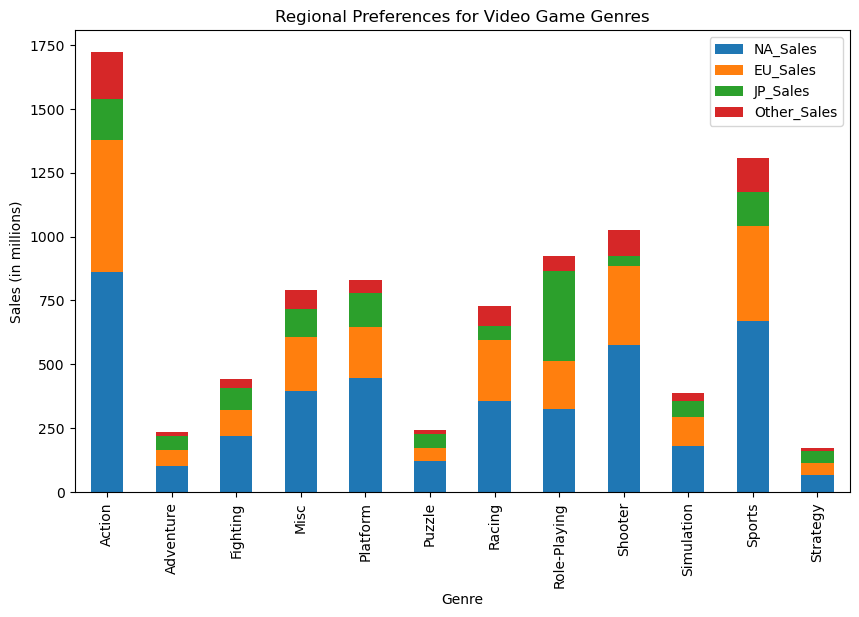

In [62]:
genre_sales_by_region.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Regional Preferences for Video Game Genres')
plt.xlabel('Genre')
plt.ylabel('Sales (in millions)')
plt.show()

# 6. Global Sales Contribution by Region

In [151]:
print("\nGlobal Sales Contribution by Region:")
total_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
total_sales_percentage = (total_sales / total_sales.sum()) * 100
total_sales_percentage


Global Sales Contribution by Region:


NA_Sales       49.135852
EU_Sales       27.325399
JP_Sales       14.581517
Other_Sales     8.957232
dtype: float64

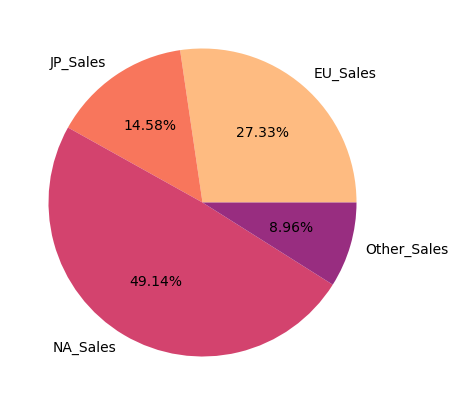

In [68]:
area_sales = df[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']]
area_sales = area_sales.melt(var_name='Area',value_name='Total_Sales')
area_sales = area_sales.groupby('Area')['Total_Sales'].sum().reset_index()

plt.figure(figsize=(10,5))
plt.pie(area_sales['Total_Sales'],labels=area_sales['Area'],colors=sns.color_palette('magma_r'),autopct='%.2f%%')
plt.show()

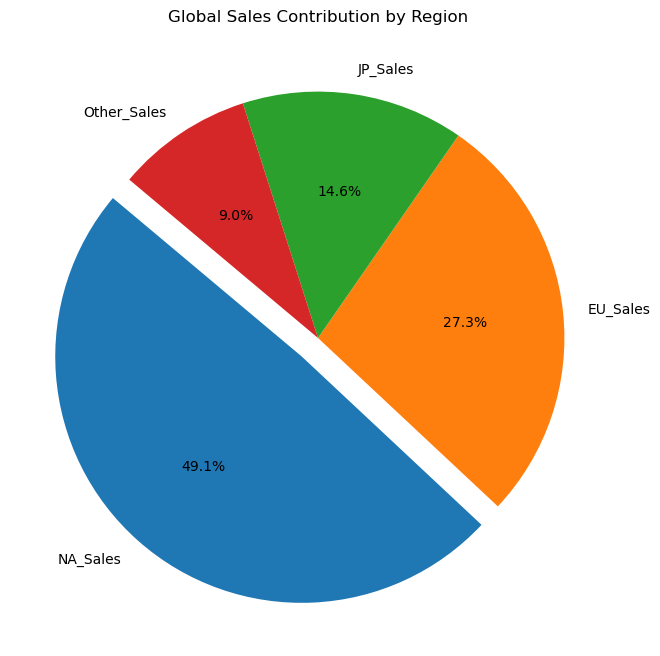

In [153]:
plt.figure(figsize=(8, 8))
total_sales_percentage.plot(kind='pie', autopct='%1.1f%%', startangle=140, explode=[0.1, 0, 0, 0])
plt.title('Global Sales Contribution by Region')
plt.ylabel('')
plt.show()

# 7. Top Publishers by Global Sales

In [73]:
print("\nTop Publishers by Global Sales:")
top_publishers = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)
top_publishers


Top Publishers by Global Sales:


Publisher
Nintendo                        1784.43
Electronic Arts                 1093.39
Activision                       721.41
Sony Computer Entertainment      607.28
Ubisoft                          473.54
Take-Two Interactive             399.30
THQ                              340.44
Konami Digital Entertainment     278.56
Sega                             270.70
Namco Bandai Games               253.65
Name: Global_Sales, dtype: float64

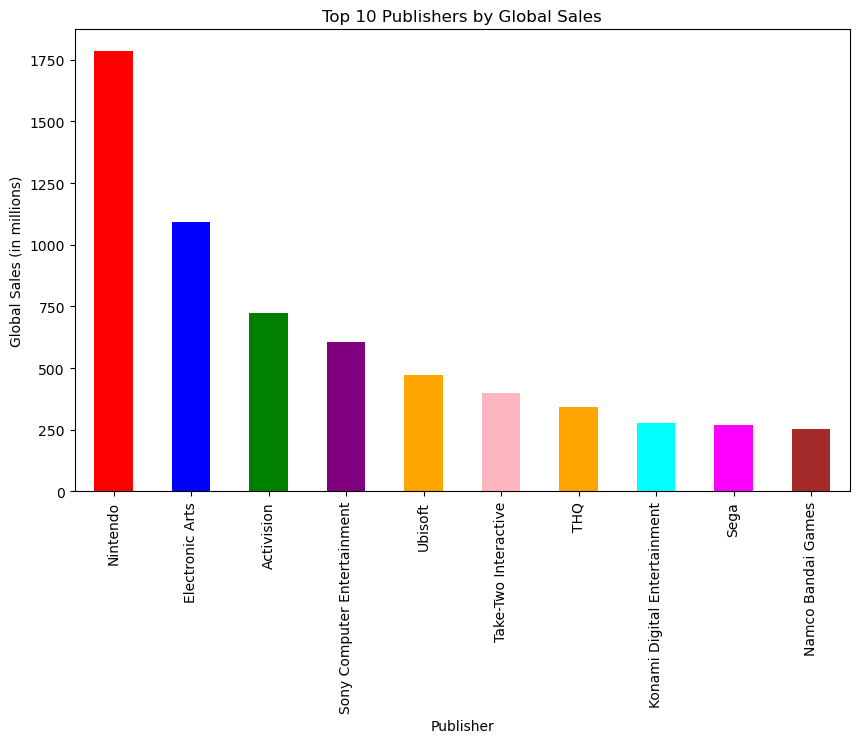

In [85]:
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green', 'purple', 'orange', 'lightpink', 'orange', 'cyan', 'magenta', 'brown'}
top_publishers.plot(kind='bar', color=colors)
plt.title('Top 10 Publishers by Global Sales')
plt.xlabel('Publisher')
plt.ylabel('Global Sales (in millions)')
plt.show()

# 8. Publishers with Most Number of Games Released

In [116]:
print("\nTop 10 Publishers by Number of Games Released:")
publisher_counts = df['Publisher'].value_counts().head(10)
publisher_counts


Top 10 Publishers by Number of Games Released:


Publisher
Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
THQ                              712
Nintendo                         696
Sony Computer Entertainment      682
Sega                             632
Take-Two Interactive             412
Name: count, dtype: int64

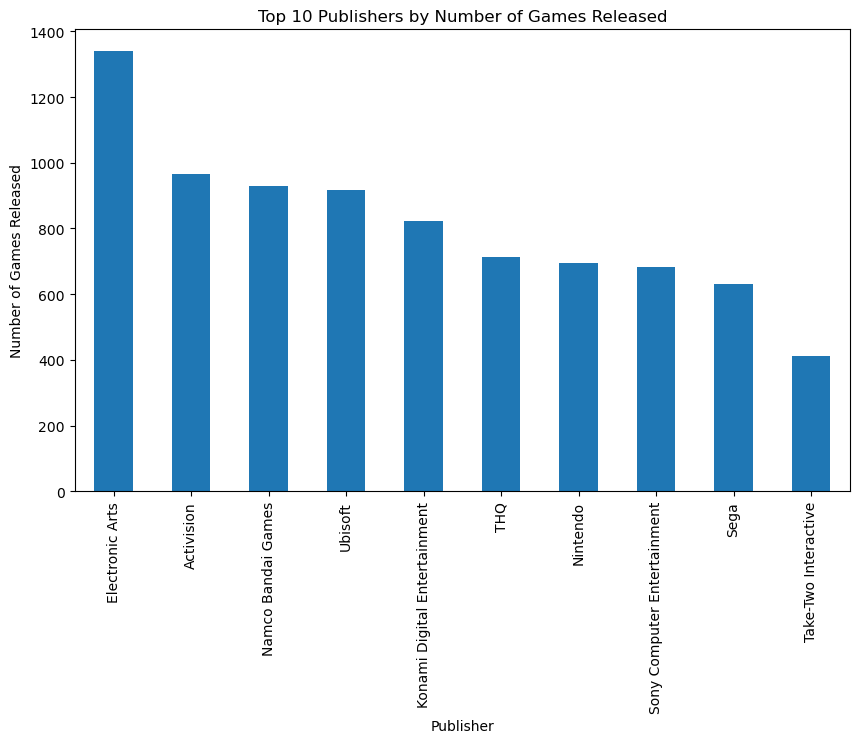

In [119]:
plt.figure(figsize=(10, 6))
publisher_counts.plot(kind='bar')
plt.title('Top 10 Publishers by Number of Games Released')
plt.xlabel('Publisher')
plt.ylabel('Number of Games Released')
plt.show()

# 9. Correlation Analysis Between Regional Sales

In [89]:
print("\nCorrelation Matrix Between Regional Sales:")
regional_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
corr_matrix = regional_sales.corr()
corr_matrix


Correlation Matrix Between Regional Sales:


,NA_Sales,EU_Sales,JP_Sales,Other_Sales
NA_Sales,1.000000,0.768923,0.451283,0.634518
EU_Sales,0.768923,1.000000,0.436379,0.726256
JP_Sales,0.451283,0.436379,1.000000,0.290559
Other_Sales,0.634518,0.726256,0.290559,1.000000


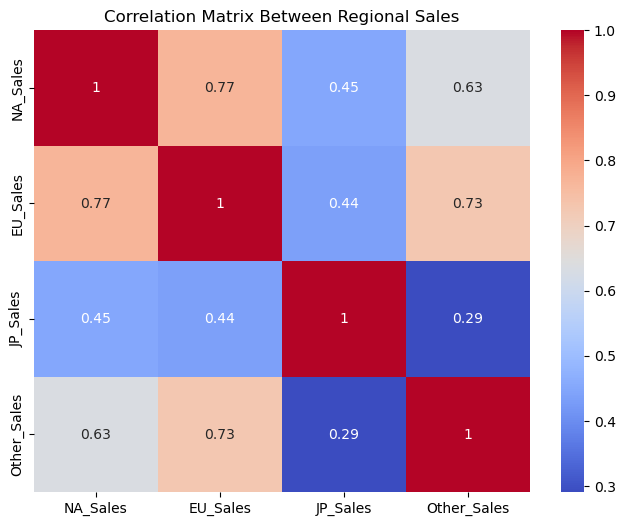

In [91]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Between Regional Sales')
plt.show()

# 10. Most Popular Genres Over the Years
Below, there will be 3 different kinds of the same graph. The reason I have done that is to have different forms to have a reference for future use.

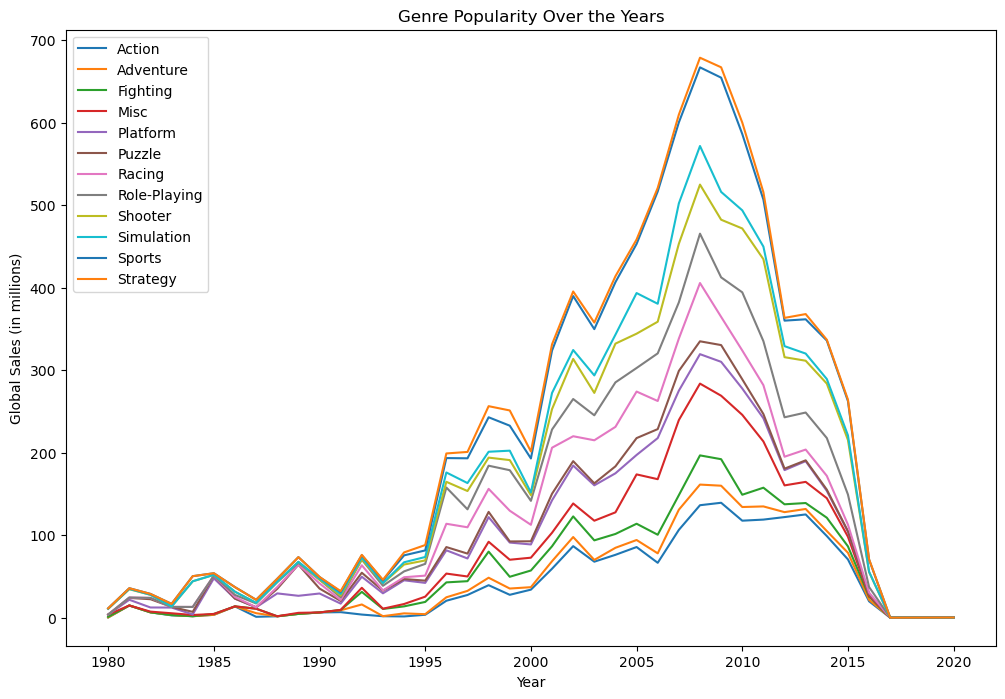

In [99]:
genre_year = df.pivot_table(values='Global_Sales', index='Year', columns='Genre', aggfunc='sum', fill_value=0)
genre_year.plot(kind='line', stacked=True, figsize=(12, 8))
plt.title('Genre Popularity Over the Years')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.legend(loc='upper left')
plt.show()

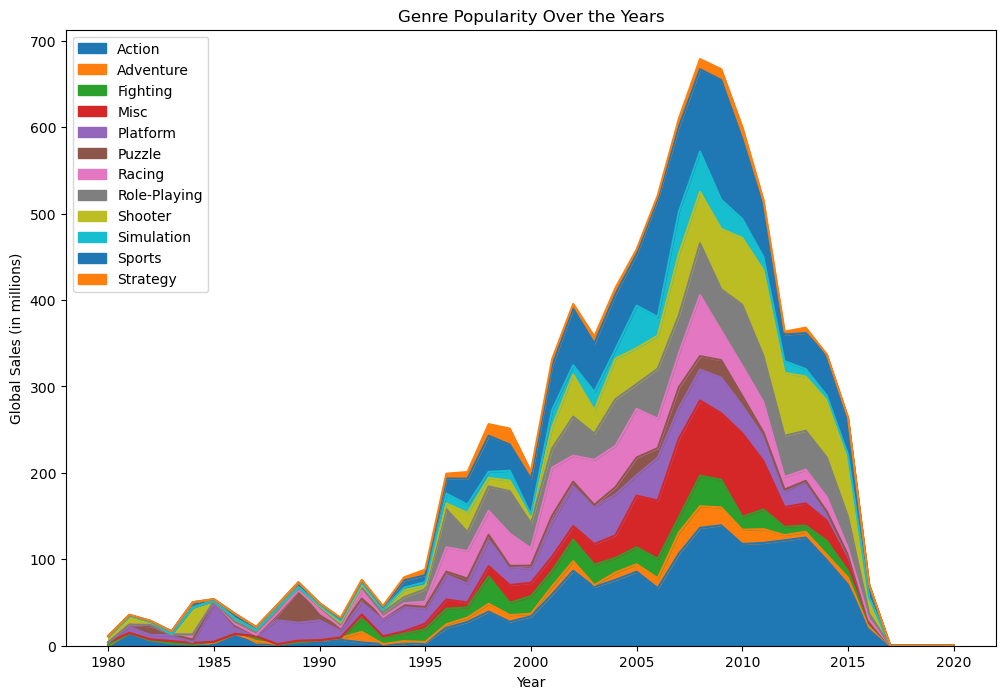

In [103]:
genre_year = df.pivot_table(values='Global_Sales', index='Year', columns='Genre', aggfunc='sum', fill_value=0)
genre_year.plot(kind='area', stacked=True, figsize=(12, 8))
plt.title('Genre Popularity Over the Years')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.legend(loc='upper left')
plt.show()

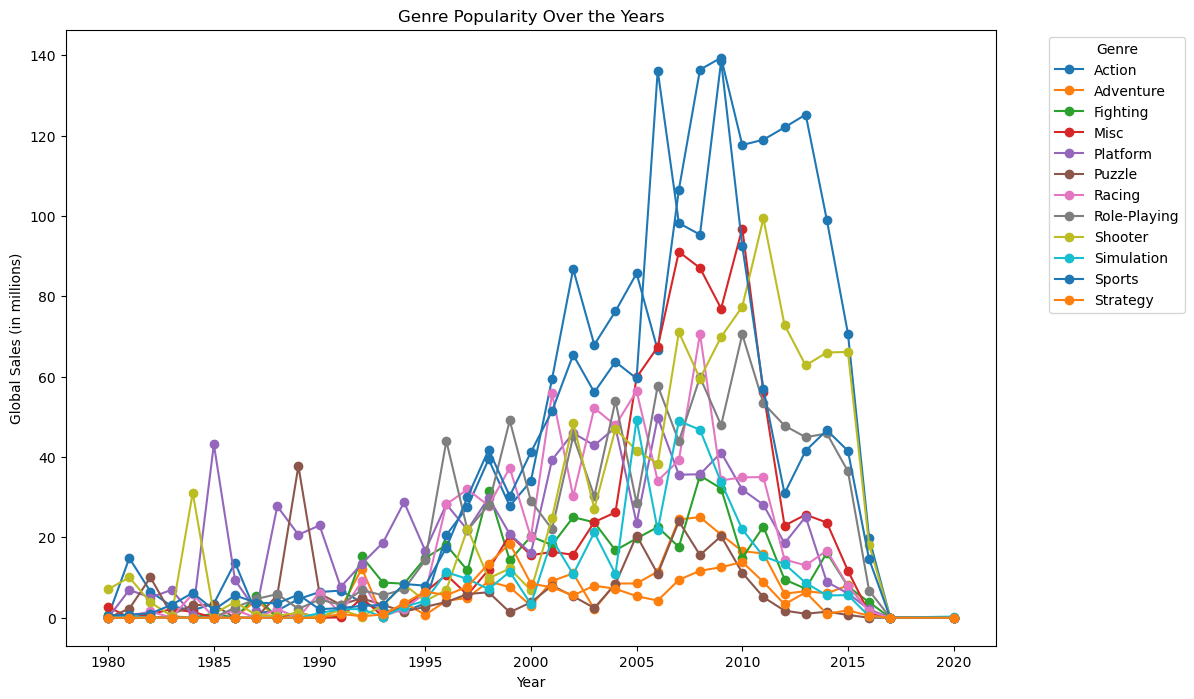

In [105]:
genre_year = df.pivot_table(values='Global_Sales', index='Year', columns='Genre', aggfunc='sum', fill_value=0)
plt.figure(figsize=(12, 8))
for genre in genre_year.columns:
    plt.plot(genre_year.index, genre_year[genre], marker='o', label=genre)
plt.title('Genre Popularity Over the Years')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title="Genre")
plt.show()

# 11. Top 10 Games with Highest Sales Growth Between Regions

In [114]:
print("\nTop 10 Games with Highest Sales Difference Between NA and JP:")
df['Sales_Diff_NA_JP'] = abs(df['NA_Sales'] - df['JP_Sales'])
top_sales_diff = df.sort_values(by='Sales_Diff_NA_JP', ascending=False).head(10)
top_sales_diff[['Name', 'Platform', 'NA_Sales', 'JP_Sales', 'Sales_Diff_NA_JP']]


Top 10 Games with Highest Sales Difference Between NA and JP:


,Name,Platform,NA_Sales,JP_Sales,Sales_Diff_NA_JP
0,Wii Sports,Wii,41.49,3.77,37.72
9,Duck Hunt,NES,26.93,0.28,26.65
1,Super Mario Bros.,NES,29.08,6.81,22.27
5,Tetris,GB,23.20,4.22,18.98
15,Kinect Adventures!,X360,14.97,0.24,14.73
3,Wii Sports Resort,Wii,15.75,3.28,12.47
2,Mario Kart Wii,Wii,15.85,3.79,12.06
7,Wii Play,Wii,14.03,2.93,11.10
8,New Super Mario Bros. Wii,Wii,14.59,4.70,9.89
23,Grand Theft Auto V,X360,9.63,0.06,9.57


# 12. Average Sales per Genre

In [122]:
print("\nAverage Global Sales per Genre:")
avg_sales_genre = df.groupby('Genre')['Global_Sales'].mean().sort_values(ascending=False)
avg_sales_genre


Average Global Sales per Genre:


Genre
Platform        0.947577
Shooter         0.800468
Role-Playing    0.628456
Racing          0.593273
Sports          0.568247
Fighting        0.531160
Action          0.529942
Misc            0.468488
Simulation      0.459882
Puzzle          0.424930
Strategy        0.258612
Adventure       0.184137
Name: Global_Sales, dtype: float64

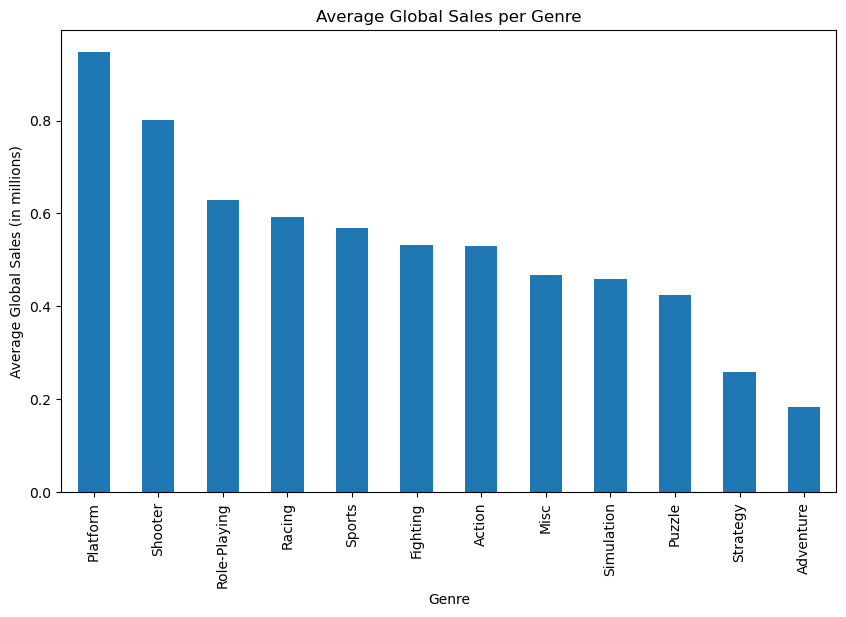

In [125]:
plt.figure(figsize=(10, 6))
avg_sales_genre.plot(kind='bar')
plt.title('Average Global Sales per Genre')
plt.xlabel('Genre')
plt.ylabel('Average Global Sales (in millions)')
plt.show()

# 13. Scatter Plot of NA Sales vs. EU Sales


Scatter Plot of NA Sales vs. EU Sales:


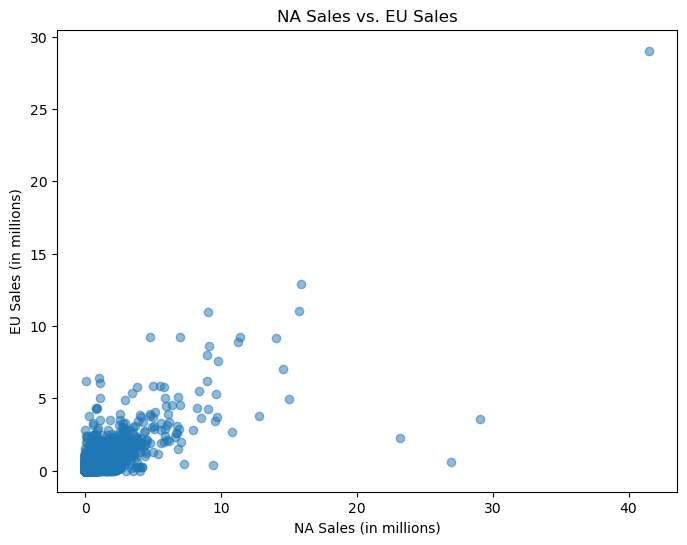

In [127]:
plt.figure(figsize=(8, 6))
plt.scatter(df['NA_Sales'], df['EU_Sales'], alpha=0.5)
plt.title('NA Sales vs. EU Sales')
plt.xlabel('NA Sales (in millions)')
plt.ylabel('EU Sales (in millions)')
plt.show()

# 14. Sales Distribution by Genre and Platform

In [146]:
print("\nSales Distribution by Genre and Platform:")
genre_platform_sales = df.pivot_table(values='Global_Sales', index='Genre', columns='Platform', aggfunc='sum', fill_value=0)
genre_platform_sales


Sales Distribution by Genre and Platform:


Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
Genre,,,,,,,,,,,,,,,,,,,,,
Action,26.39,0.00,56.61,1.26,114.16,7.92,54.26,37.25,2.74,0.00,...,0.65,0.00,10.08,0.00,0.00,110.48,19.35,239.67,47.46,33.79
Adventure,0.40,0.06,4.73,2.50,47.15,17.16,12.10,5.93,0.19,0.00,...,4.16,0.00,1.50,0.14,0.00,18.33,0.17,15.23,3.06,2.51
Fighting,0.77,0.00,10.46,1.83,7.20,0.00,4.21,18.43,5.90,0.00,...,8.52,0.00,26.95,0.00,0.00,23.82,6.36,37.64,12.83,2.31
Misc,3.58,0.00,10.48,0.00,137.67,13.35,28.50,16.45,0.03,0.00,...,1.20,0.10,5.02,0.00,0.00,217.43,12.23,89.33,8.67,6.86
Platform,13.27,0.00,32.23,2.54,77.40,53.88,78.08,28.66,15.45,0.04,...,0.76,1.50,65.65,0.00,0.00,90.68,21.24,11.39,9.66,0.81
Puzzle,13.65,0.02,5.56,0.00,83.87,47.47,12.09,4.57,0.00,0.00,...,1.00,0.00,6.38,0.00,0.00,15.63,1.33,0.71,0.42,0.00
Racing,2.32,0.00,14.41,2.65,38.58,4.55,18.80,21.79,0.26,0.00,...,2.40,0.07,13.49,0.00,0.00,61.24,7.77,65.13,31.42,8.80
Role-Playing,0.00,0.00,75.71,0.68,126.56,88.24,64.21,13.03,0.27,0.00,...,3.76,0.06,36.43,0.00,1.22,14.06,2.47,71.97,13.51,9.48
Shooter,22.97,0.00,1.22,0.33,8.20,1.20,3.60,13.63,0.13,0.00,...,3.98,0.00,6.07,0.02,0.00,26.34,6.17,277.23,62.12,51.61


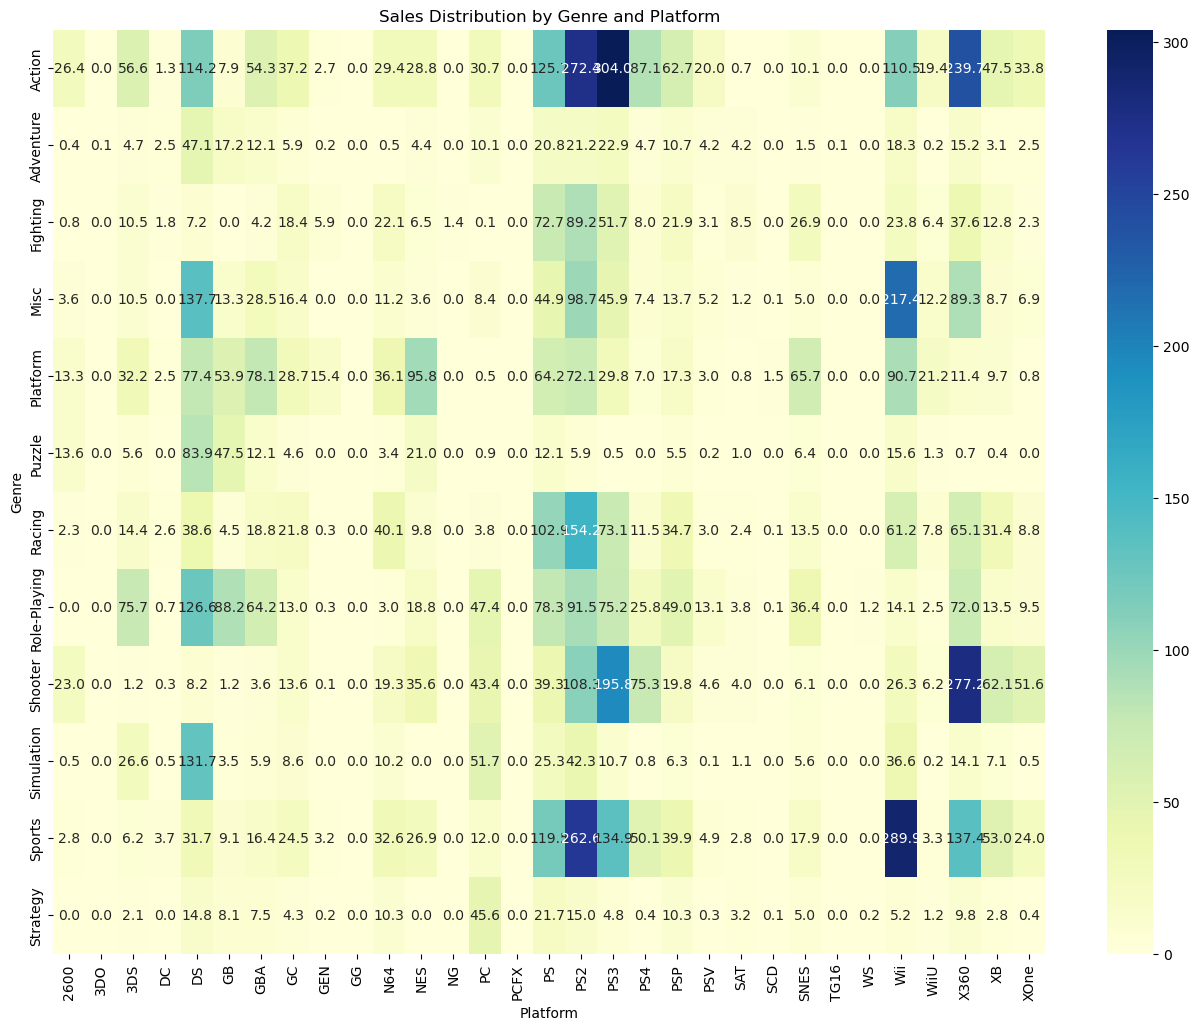

In [203]:
plt.figure(figsize=(16, 12))
sns.heatmap(genre_platform_sales, cmap='YlGnBu', annot=True, fmt=".1f")
plt.title('Sales Distribution by Genre and Platform')
plt.xlabel('Platform')
plt.ylabel('Genre')
plt.show()

# 15. Average Game Sales by Publisher

In [156]:
print("\nAverage Game Sales by Publisher (Top 10 Publishers):")
avg_sales_publisher = df.groupby('Publisher')['Global_Sales'].mean().sort_values(ascending=False).head(10)
avg_sales_publisher


Average Game Sales by Publisher (Top 10 Publishers):


Publisher
Palcom                                4.170000
Red Orb                               2.620000
Nintendo                              2.563836
Arena Entertainment                   2.360000
UEP Systems                           2.250000
RedOctane                             2.170000
Valve                                 1.740000
Hello Games                           1.600000
Sony Computer Entertainment Europe    1.592667
Westwood Studios                      1.550000
Name: Global_Sales, dtype: float64

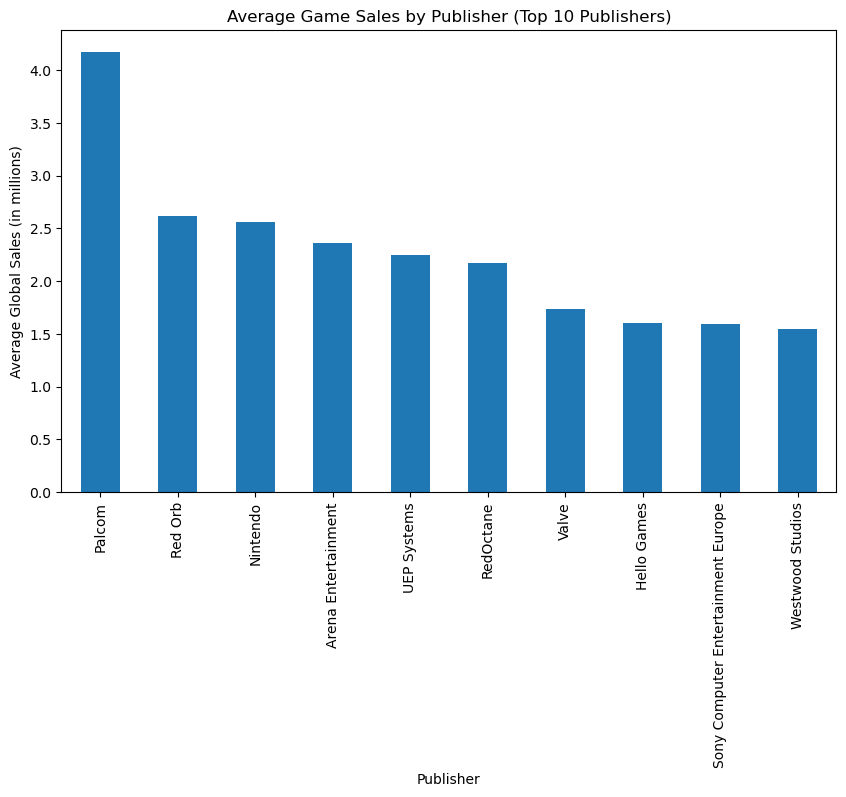

In [158]:
plt.figure(figsize=(10, 6))
avg_sales_publisher.plot(kind='bar')
plt.title('Average Game Sales by Publisher (Top 10 Publishers)')
plt.xlabel('Publisher')
plt.ylabel('Average Global Sales (in millions)')
plt.show()

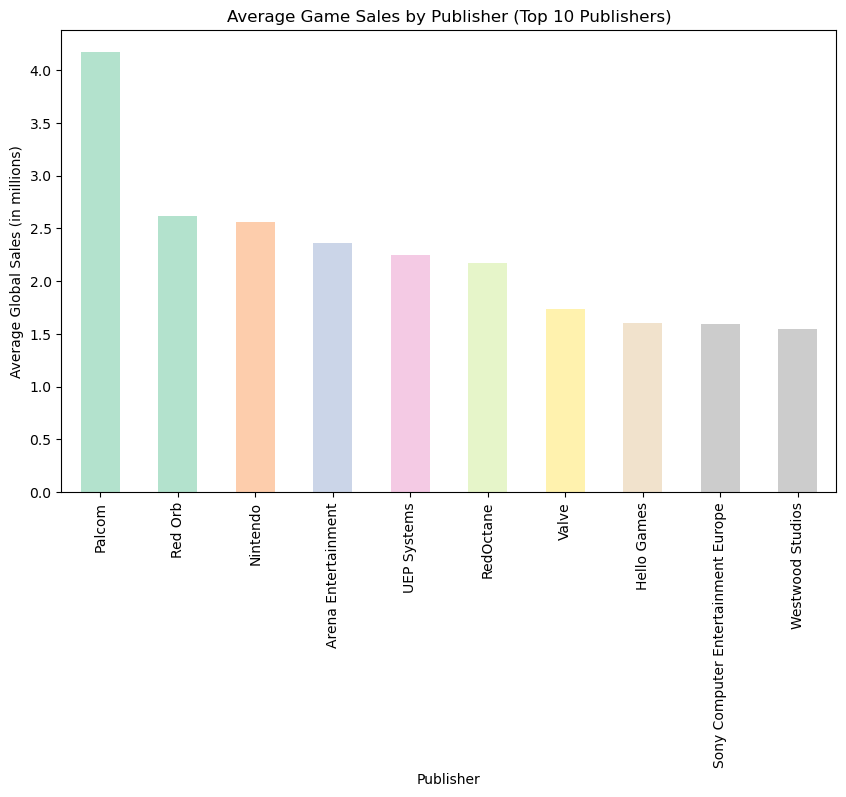

In [172]:
plt.figure(figsize=(10, 6))
colors = plt.cm.Pastel2(np.linspace(0, 1, len(avg_sales_publisher)))
avg_sales_publisher.plot(kind='bar', color=colors)
plt.title('Average Game Sales by Publisher (Top 10 Publishers)')
plt.xlabel('Publisher')
plt.ylabel('Average Global Sales (in millions)')
plt.show()

# 16. Platform Popularity Over Time

In [174]:
print("\nPlatform Popularity Over Time (Based on Number of Games Released):")
platform_year = df.pivot_table(values='Name', index='Year', columns='Platform', aggfunc='count', fill_value=0)
platform_year


Platform Popularity Over Time (Based on Number of Games Released):


Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
Year,,,,,,,,,,,,,,,,,,,,,
1980,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1981,46,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1982,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1983,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1984,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1985,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1986,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1987,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1988,2,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Figure size 1600x1200 with 0 Axes>

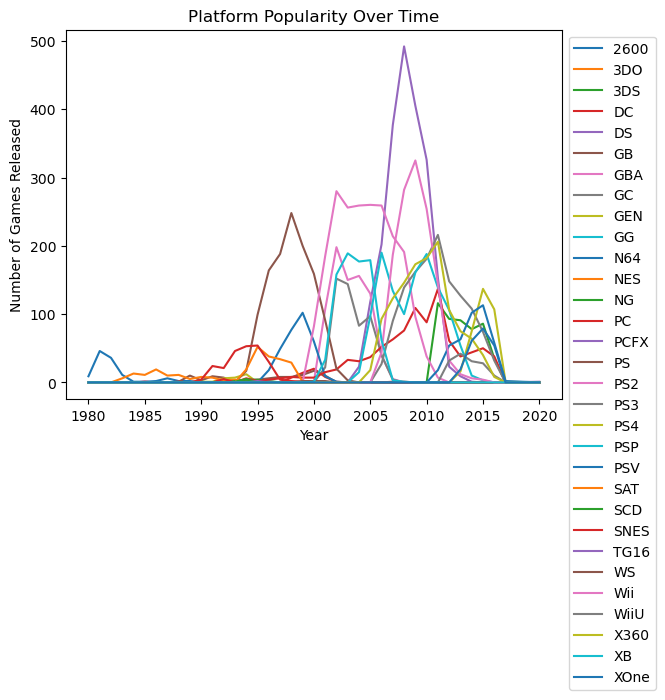

In [201]:
plt.figure(figsize=(16, 12))
platform_year.plot(kind='line')
plt.title('Platform Popularity Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Games Released')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()

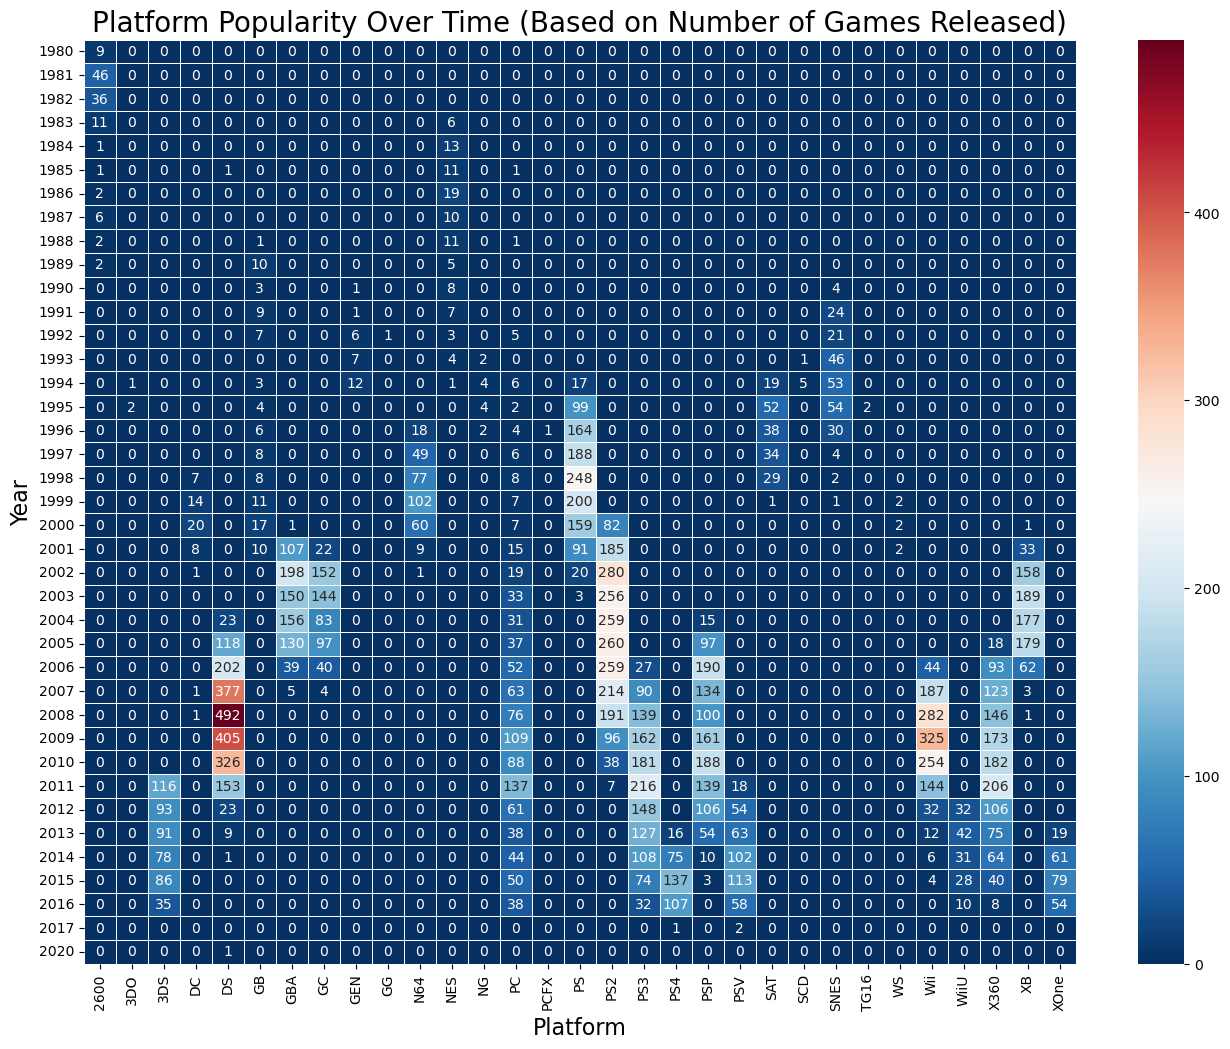

In [211]:
platform_year = df.pivot_table(values='Name', index='Year', columns='Platform', aggfunc='count', fill_value=0)
plt.figure(figsize=(16, 12))
sns.heatmap(platform_year, cmap='RdBu_r', annot=True, fmt='d', linewidths=.5)
plt.title('Platform Popularity Over Time (Based on Number of Games Released)', fontsize=20)
plt.xlabel('Platform', fontsize=16)
plt.ylabel('Year', fontsize=16)
plt.show()

# 17. Platform Popularity Over Time

In [218]:
print("\nPlatform Popularity Over Time (Based on Number of Games Released):")
platform_year = df.pivot_table(values='Name', index='Year', columns='Platform', aggfunc='count', fill_value=0)
platform_year


Platform Popularity Over Time (Based on Number of Games Released):


Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
Year,,,,,,,,,,,,,,,,,,,,,
1980,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1981,46,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1982,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1983,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1984,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1985,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1986,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1987,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1988,2,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Figure size 1200x800 with 0 Axes>

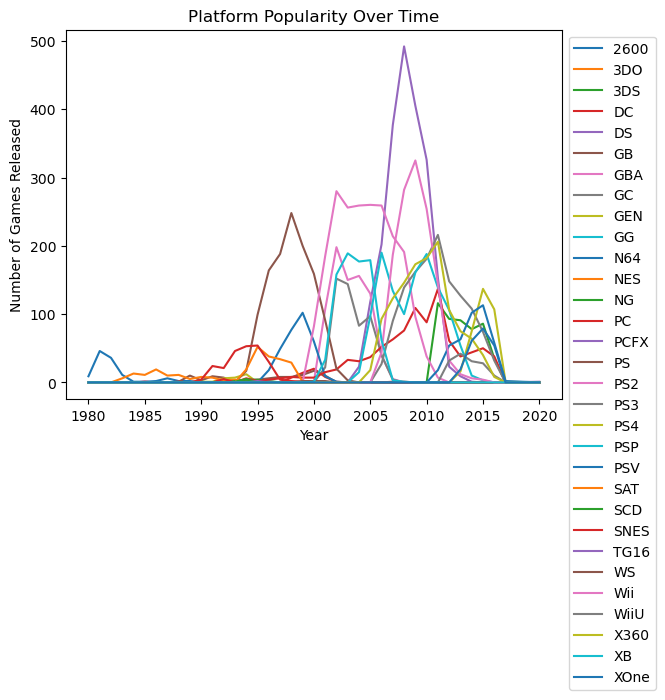

In [220]:
plt.figure(figsize=(12, 8))
platform_year.plot(kind='line')
plt.title('Platform Popularity Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Games Released')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()

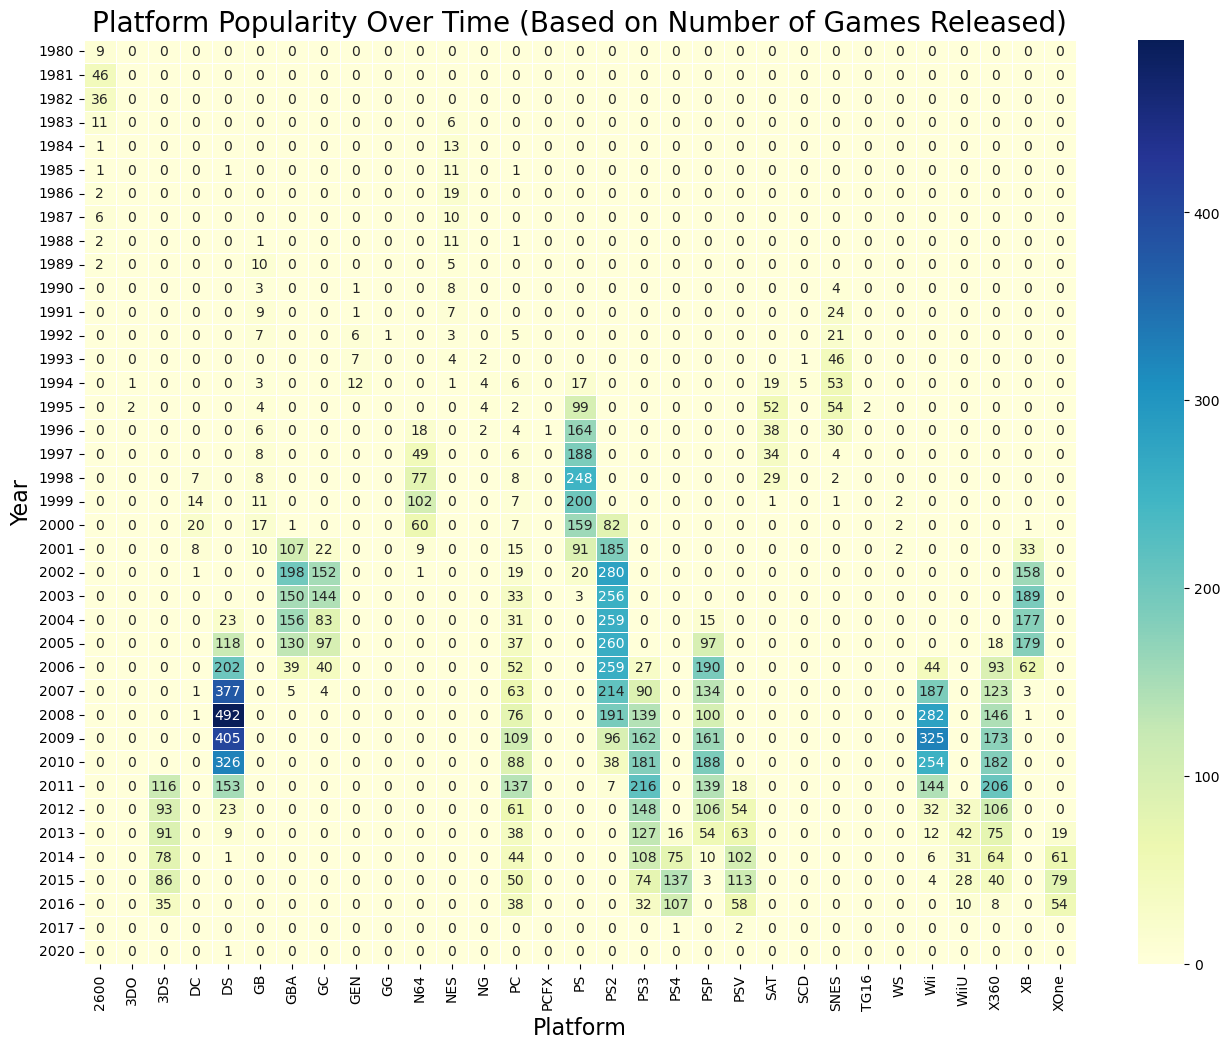

In [222]:
platform_year = df.pivot_table(values='Name', index='Year', columns='Platform', aggfunc='count', fill_value=0)
plt.figure(figsize=(16, 12))
sns.heatmap(platform_year, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)
plt.title('Platform Popularity Over Time (Based on Number of Games Released)', fontsize=20)
plt.xlabel('Platform', fontsize=16)
plt.ylabel('Year', fontsize=16)
plt.show()

# 18. Analysis of Games with Sales Above a Certain Threshold
Change threshold to check for certain amount of sales

In [227]:
threshold = 10  # in millions
print(f"\nGames with Sales Above {threshold} Million Units:")
high_sales_games = df[df['Global_Sales'] > threshold]
high_sales_games[['Name', 'Platform', 'Global_Sales']]


Games with Sales Above 10 Million Units:


,Name,Platform,Global_Sales
0,Wii,Wii,82.74
1,Super,NES,40.24
2,Mario,Wii,35.82
3,Wii,Wii,33.00
4,Pokemon,GB,31.37
...,...,...,...
57,Super,SNES,10.55
58,Pokemon,GBA,10.49
59,Super,DS,10.42
60,Just,Wii,10.26


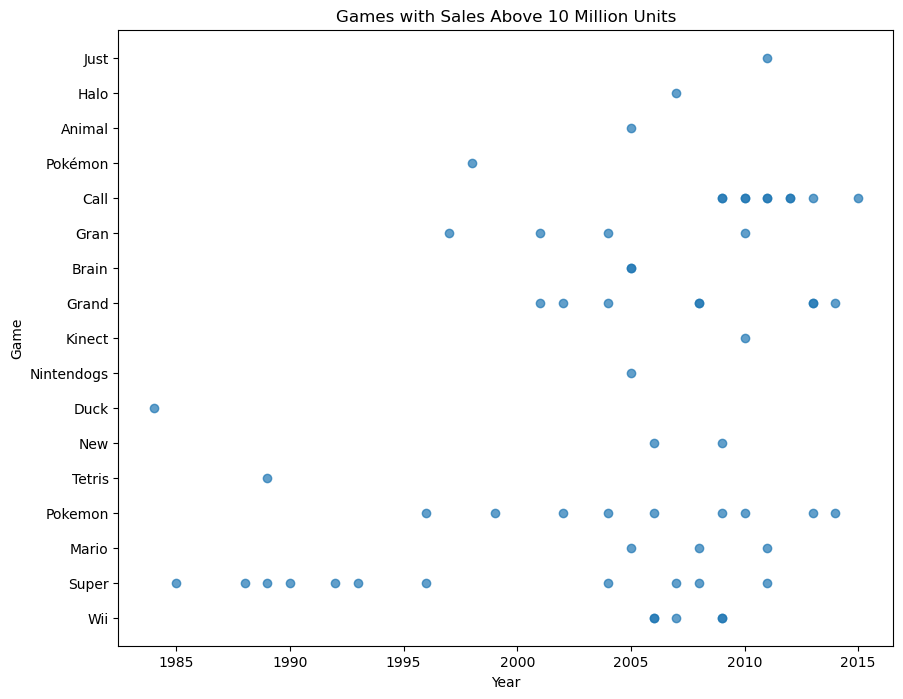

In [235]:
plt.figure(figsize=(10, 8))
plt.scatter(x=high_sales_games['Year'], y=high_sales_games['Name'], alpha=0.7)
plt.title(f'Games with Sales Above {threshold} Million Units')
plt.xlabel('Year')
plt.ylabel('Game')
plt.show()